In [80]:
import pandas as pd

bitcoinHistoryData= pd.read_csv("data/BTC_USD_BitStamp.csv")
bitcoinHistoryData

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,17.05.2025,"103.396,0","103.502,0","103.720,0","102.668,0","0,84K","-0,11%"
1,16.05.2025,"103.506,0","103.796,0","104.570,0","103.137,0","1,00K","-0,28%"
2,15.05.2025,"103.796,0","103.531,0","104.184,0","101.442,0","1,34K","0,26%"
3,14.05.2025,"103.531,0","104.126,0","104.354,0","102.622,0","1,17K","-0,58%"
4,13.05.2025,"104.135,0","102.795,0","104.997,0","101.489,0","1,43K","1,30%"
...,...,...,...,...,...,...,...
2742,21.05.2015,"235,5","233,8","236,5","233,8","4,59K","0,72%"
2743,20.05.2015,"233,8","231,7","234,9","231,0","7,68K","0,91%"
2744,19.05.2015,"231,7","232,2","234,2","230,9","5,56K","-0,24%"
2745,18.05.2015,"232,2","236,1","236,9","231,4","7,42K","-1,61%"


In [28]:
def limpiar_bitstamp_csv(df):
    # Renombrar columnas desde español a inglés estándar
    df = df.rename(columns={
        "Fecha": "date",
        "Último": "price",
        "Apertura": "open",
        "Máximo": "high",
        "Mínimo": "low",
        "Vol.": "vol",
        "% var.": "changepct"
    })

    # Convertir fechas
    df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y", errors="coerce")
    df.dropna(subset=["date"], inplace=True)
    df = df.sort_values("date").set_index("date")

    # Eliminar coma y valores posteriores solo en columnas de precio
    for col in ["price", "open", "high", "low"]:
        df[col] = df[col].astype(str).str.replace(r",.*", "", regex=True)
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Reemplazos de sufijos para vol
    df["vol"] = df["vol"].astype(str).replace({"M": "0000", "K": "0", "B": "0000000"}, regex=True)
    df["vol"] = pd.to_numeric(df["vol"], errors="coerce")

    # Limpieza de changepct: eliminar % y reemplazar , por .
    df["changepct"] = df["changepct"].astype(str).str.replace("%", "").str.replace(",", ".")
    df["changepct"] = pd.to_numeric(df["changepct"], errors="coerce")

    return df.dropna()

In [30]:
limpiar_bitstamp_csv(bitcoinHistoryData)

,price,open,high,low,vol,changepct
date,,,,,,


In [81]:
df =bitcoinHistoryData 
df = df.rename(columns={
        "Fecha": "date",
        "Último": "price",
        "Apertura": "open",
        "Máximo": "high",
        "Mínimo": "low",
        "Vol.": "vol",
        "% var.": "changepct"
    })

# Convertir fechas
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y", errors="coerce")
df.dropna(subset=["date"], inplace=True)
df = df.sort_values("date").set_index("date")

In [82]:
df

,price,open,high,low,vol,changepct
date,,,,,,
2015-05-17,"236,1","235,6","237,0","234,1","2,63K","0,19%"
2015-05-18,"232,2","236,1","236,9","231,4","7,42K","-1,61%"
2015-05-19,"231,7","232,2","234,2","230,9","5,56K","-0,24%"
2015-05-20,"233,8","231,7","234,9","231,0","7,68K","0,91%"
2015-05-21,"235,5","233,8","236,5","233,8","4,59K","0,72%"
...,...,...,...,...,...,...
2025-05-13,"104.135,0","102.795,0","104.997,0","101.489,0","1,43K","1,30%"
2025-05-14,"103.531,0","104.126,0","104.354,0","102.622,0","1,17K","-0,58%"
2025-05-15,"103.796,0","103.531,0","104.184,0","101.442,0","1,34K","0,26%"


In [ ]:
# Eliminar coma y valores posteriores solo en columnas de precio
for col in ["price", "open", "high", "low"]:
    df[col] = df[col].replace(to_replace=(","),value=(""),regex=True)
    df[col] = df[col].replace(to_replace=("."),value=(""),regex=True)

In [84]:
df

,price,open,high,low,vol,changepct
date,,,,,,
2015-05-17,2361,2356,2370,2341,"2,63K","0,19%"
2015-05-18,2322,2361,2369,2314,"7,42K","-1,61%"
2015-05-19,2317,2322,2342,2309,"5,56K","-0,24%"
2015-05-20,2338,2317,2349,2310,"7,68K","0,91%"
2015-05-21,2355,2338,2365,2338,"4,59K","0,72%"
...,...,...,...,...,...,...
2025-05-13,104.1350,102.7950,104.9970,101.4890,"1,43K","1,30%"
2025-05-14,103.5310,104.1260,104.3540,102.6220,"1,17K","-0,58%"
2025-05-15,103.7960,103.5310,104.1840,101.4420,"1,34K","0,26%"


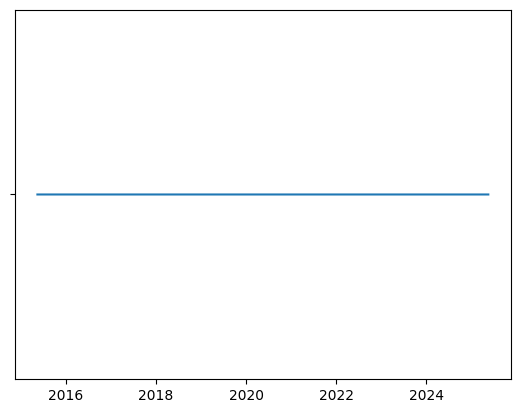

In [62]:
import matplotlib.pyplot as plt
plt.plot(df["price"]);

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2747 entries, 2015-05-17 to 2025-05-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      2747 non-null   float64
 1   open       2747 non-null   float64
 2   high       2747 non-null   float64
 3   low        2747 non-null   float64
 4   vol        2110 non-null   object 
 5   changepct  2747 non-null   object 
dtypes: float64(4), object(2)
memory usage: 150.2+ KB


In [24]:

dfBTCDaily=df[["price", "open", "high", "low", "vol", "changepct"]].replace(to_replace=(",","%"),value="",regex=True).replace(to_replace="M",value="0000",regex=True).replace(to_replace="K",value="0",regex=True).replace(to_replace="B",value="0000000",regex=True).astype(float)

In [25]:
dfBTCDaily

,price,open,high,low,vol,changepct
date,,,,,,
2015-05-17,2361.000,2356.000,2370.000,2341.000,2630.0,19.0
2015-05-18,2322.000,2361.000,2369.000,2314.000,7420.0,-161.0
2015-05-19,2317.000,2322.000,2342.000,2309.000,5560.0,-24.0
2015-05-20,2338.000,2317.000,2349.000,2310.000,7680.0,91.0
2015-05-21,2355.000,2338.000,2365.000,2338.000,4590.0,72.0
...,...,...,...,...,...,...
2025-05-13,104.135,102.795,104.997,101.489,1430.0,130.0
2025-05-14,103.531,104.126,104.354,102.622,1170.0,-58.0
2025-05-15,103.796,103.531,104.184,101.442,1340.0,26.0


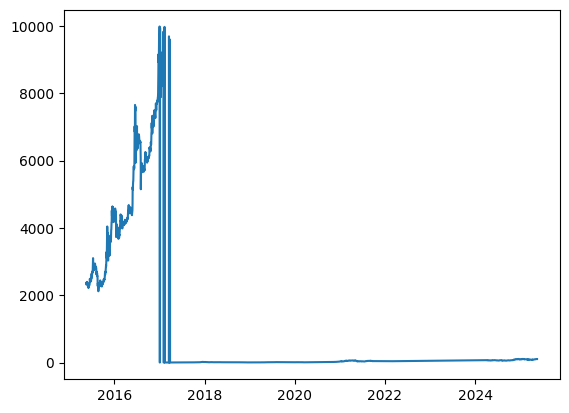

In [27]:
import matplotlib.pyplot as plt
plt.plot(dfBTCDaily["price"]);

In [4]:
bitcoinHistoryData.set_index("Fecha",inplace=True)
bitcoinHistoryData.index=pd.to_datetime(bitcoinHistoryData.index)
dfBTCDaily=bitcoinHistoryData[["Último","Apertura","Máximo","Mínimo","Vol.","% var."]].replace(to_replace=(",","%"),value="",regex=True).replace(to_replace="M",value="0000",regex=True).replace(to_replace="K",value="0",regex=True).replace(to_replace="B",value="0000000",regex=True).astype(float)

C:\Users\nicoc\AppData\Local\Temp\ipykernel_32800\1308335529.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bitcoinHistoryData.index=pd.to_datetime(bitcoinHistoryData.index)


In [5]:
dfBTCDaily

,Último,Apertura,Máximo,Mínimo,Vol.,% var.
Fecha,,,,,,
2025-05-17,103.396,103.502,103.720,102.668,840.0,-11.0
2025-05-16,103.506,103.796,104.570,103.137,1000.0,-28.0
2025-05-15,103.796,103.531,104.184,101.442,1340.0,26.0
2025-05-14,103.531,104.126,104.354,102.622,1170.0,-58.0
2025-05-13,104.135,102.795,104.997,101.489,1430.0,130.0
...,...,...,...,...,...,...
2015-05-21,2355.000,2338.000,2365.000,2338.000,4590.0,72.0
2015-05-20,2338.000,2317.000,2349.000,2310.000,7680.0,91.0
2015-05-19,2317.000,2322.000,2342.000,2309.000,5560.0,-24.0


In [10]:
dfBTCDaily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2747 entries, 2025-05-17 to 2015-05-17
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    2747 non-null   float64
 1   Apertura  2747 non-null   float64
 2   Máximo    2747 non-null   float64
 3   Mínimo    2747 non-null   float64
 4   Vol.      2110 non-null   float64
 5   % var.    2747 non-null   float64
dtypes: float64(6)
memory usage: 150.2 KB


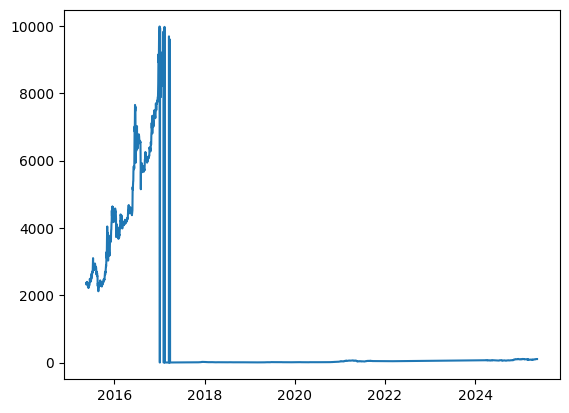

In [11]:
import matplotlib.pyplot as plt
plt.plot(dfBTCDaily["Último"]);

In [17]:
def limpiar_bitstamp_csv(df):
    # Renombrar columnas desde español a inglés estándar
    df = df.rename(columns={
        "Fecha": "date",
        "Último": "price",
        "Apertura": "open",
        "Máximo": "high",
        "Mínimo": "low",
        "Vol.": "vol",
        "% var.": "changepct"
    })

    # Convertir fechas
    df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y", errors="coerce")
    df.dropna(subset=["date"], inplace=True)
    df = df.sort_values("date").set_index("date")

    # Limpiar valores numéricos
    for col in ["price", "open", "high", "low"]:
        df[col] = df[col].astype(str).str.replace(".", "", regex=True).str.replace(",", ".", regex=True)
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Limpiar volumen con K, M, B
    df["vol"] = df["vol"].astype(str).str.replace(",", ".")
    df["vol"] = df["vol"].str.replace("K", "e3",regex=True).str.replace("M", "e6").str.replace("B", "e9",regex=True)
    df["vol"] = pd.to_numeric(df["vol"], errors="coerce")

    # Limpiar cambio porcentual
    df["changepct"] = df["changepct"].astype(str).str.replace("%", "",regex=True).str.replace(",", ".",regex=True)
    df["changepct"] = pd.to_numeric(df["changepct"], errors="coerce")

    return df.dropna()

In [18]:
bitcoinHistoryData= pd.read_csv("data/BTC_USD_BitStamp.csv")
bitcoinHistoryData

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,17.05.2025,"103.396,0","103.502,0","103.720,0","102.668,0","0,84K","-0,11%"
1,16.05.2025,"103.506,0","103.796,0","104.570,0","103.137,0","1,00K","-0,28%"
2,15.05.2025,"103.796,0","103.531,0","104.184,0","101.442,0","1,34K","0,26%"
3,14.05.2025,"103.531,0","104.126,0","104.354,0","102.622,0","1,17K","-0,58%"
4,13.05.2025,"104.135,0","102.795,0","104.997,0","101.489,0","1,43K","1,30%"
...,...,...,...,...,...,...,...
2742,21.05.2015,"235,5","233,8","236,5","233,8","4,59K","0,72%"
2743,20.05.2015,"233,8","231,7","234,9","231,0","7,68K","0,91%"
2744,19.05.2015,"231,7","232,2","234,2","230,9","5,56K","-0,24%"
2745,18.05.2015,"232,2","236,1","236,9","231,4","7,42K","-1,61%"


In [19]:
limpiar_bitstamp_csv(bitcoinHistoryData)

,price,open,high,low,vol,changepct
date,,,,,,


In [16]:
bitcoinHistoryData

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,17.05.2025,"103.396,0","103.502,0","103.720,0","102.668,0","0,84K","-0,11%"
1,16.05.2025,"103.506,0","103.796,0","104.570,0","103.137,0","1,00K","-0,28%"
2,15.05.2025,"103.796,0","103.531,0","104.184,0","101.442,0","1,34K","0,26%"
3,14.05.2025,"103.531,0","104.126,0","104.354,0","102.622,0","1,17K","-0,58%"
4,13.05.2025,"104.135,0","102.795,0","104.997,0","101.489,0","1,43K","1,30%"
...,...,...,...,...,...,...,...
2742,21.05.2015,"235,5","233,8","236,5","233,8","4,59K","0,72%"
2743,20.05.2015,"233,8","231,7","234,9","231,0","7,68K","0,91%"
2744,19.05.2015,"231,7","232,2","234,2","230,9","5,56K","-0,24%"
2745,18.05.2015,"232,2","236,1","236,9","231,4","7,42K","-1,61%"


In [15]:
plt.plot(bitcoinHistoryData["price"]);

KeyError: 'price'